In [1]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

%matplotlib inline
pd.set_option('display.max_colwidth', 300)

In [2]:
df = pd.read_csv(r'C:\Users\nithi\Downloads\BigData Boss Dataset.csv')
df.sample(5)

,Release Year,Title,Language,Director,Cast,Genre,Plot,Rating
406,2017,Aval,Tamil,Milind Rau,"Siddharth, Andrea Jeremiah, Anisha Victor",horror,"The film opens with an ancient Chinese mother and daughter. They seem to spend happy moments with each other with the mother being pregnant. The movie then moves to the present where a happy couple Krishnakanth aka Krish (Siddharth) and Lakshmi (Andrea Jeremiah) make love, bringing in their memo...",7.9
270,2015,Thoongaa Vanam,Tamil,Rajesh M. Selva,"Kamal Haasan, Trisha, Prakash Raj, Kishore, Sampath Raj",crime thriller,"The film begins with Diwakar (Kamal Haasan), an Indian Revenue Service officer in the Narcotics Control Bureau, and his deputy Mani (Yugi Sethu), busting a narcotics scam. In retribution, Vittal Rao (Prakash Raj), a drug smuggler who had masterminded the scam, kidnaps Diwakar's son Vasu (Aman Ab...",7.9
61,2012,Thaandavam,Tamil,A. L. Vijay,"Vikram, Anushka Shetty, Amy Jackson, Lakshmi Rai",action,"On 1 January 2011, a sudden bomb blast occurs in London, killing several people. The scene shifts to the same place after exactly a year, where a blind man Kenny Thomas (Vikram) lays flowers on the memorial and mourns someone's death during the bomb blast. He is then given some secret details by...",5.6
29,2012,Kollaikaran,Tamil,Tamil Selvan,"Vidharth, Sanchita Shetty",drama,It is a story of a guy named Kuruvi Vidharth who does small crimes. He falls in love with a girl named Krishnaveni Sanchita Shetty who on finding him to be a criminal rejects him.\r\nKurivi's elder sister got married into Krishnaveni's family member and they become close again.\r\nAs fate would ...,7.3
86,2013,Kan Pesum Varthaigal,Tamil,R. Balaji,"Mirchi Senthil, Iniya",romance,"Mahesh Mirchi Senthil is a young unemployed man living in Thiruvarur who enjoys hanging out with his friends. His father (Livingston) is unhappy with his son's irresponsible lifestyle and attempts suicide. Mahesh then begins to search for a job, and with the help of his friend, Appu Kutty (Murug...",NaN


In [3]:
len(df.Genre.unique())

80

In [4]:
df.shape

(416, 8)

In [5]:
df["Genre"] = df["Genre"].apply(lambda x: x.split()[0])
df["Genre"] = df["Genre"].apply(lambda x: x.replace(r"/", ""))
df["Genre"] = df["Genre"].apply(lambda x: x.replace("—", " "))
df["Genre"] = df["Genre"].apply(lambda x: x.replace("-", " "))
df["Genre"] = df["Genre"].apply(lambda x: x.split()[0])
df["Genre"] = df["Genre"].apply(lambda x: x.replace(r",", ""))
df["Genre"] = df["Genre"].apply(lambda x: x.replace(r"romanctic", "romantic"))
df["Genre"] = df["Genre"].apply(lambda x: x.replace(r"sci", "scifi"))
df["Genre"] = df["Genre"].apply(lambda x: x.replace(r"romance", "romantic"))
df.sample(5)

,Release Year,Title,Language,Director,Cast,Genre,Plot,Rating
30,2012,Vettai,Tamil,N. Linguswamy,"Arya, R. Madhavan, Sameera Reddy, Amala Paul",action,"Thirumurthy and Gurumurthy are two brothers in Thoothukudi, with Thirumurthy being the elder. He is very sensitive to violence, in contrast to his younger brother who is brave and rogue. Whenever Thirumurthy is beaten by anyone, he has Gurumurthy finish them. However, Gurumurthy is frequently be...",6.2
322,2016,Joker,Tamil,Raju Murugan,"Guru Somasundaram, Ramya Pandian, Gayathri Krishna",social,Mannar Mannan is a villager who declares himself as the President of India. He leads many protests against various injustices happening around his village. Most of the time he is seen as a joker. He and his small team of like-minded individuals sue on behalf of villagers. One of his cases is aga...,3.7
180,2014,Amara Kaaviyam,Tamil,Jeeva Shankar,"Sathya, Miya",romantic,"The movie begins with Jeeva (Sathya) being taken to court, where he recalls his past. In 1989, at the beginning of his 12th standard, his friend Balaji (Ananth Nag) falls in love with Kartika (Miya) their classmate. Jeeva talks to Kartika on Balaji’s behalf but he is shocked to know that she is ...",5.6
85,2013,Paradesi,Tamil,Bala,"Adharvaa, Vedhicka, Dhansika",drama,"Rasa (Atharvaa) is a carefree young man living in a rural village in the Madras Presidency during the early days of the British Raj. Orphaned at a young age, he is brought up by his grandmother. Angamma (Vedhicka), a local girl falls for him and takes pleasure in bullying him. When she finally c...",4.7
400,2017,Magalir Mattum,Tamil,Bramma,"Jyothika, Saranya, Urvashi, Bhanupriya",drama,"Prabhavathi (Jyothika) is a feisty independent woman who makes documentaries. She lives with her two friends and later moves in with her future mother-in-law, Gomatha (Oorvasi). Prabha learns that Gomatha misses her old school friends, Subbu and Rani (Saranya Ponvanan and Banupriya), with whom g...",6.4


In [7]:
df = df[~df["Genre"].isin(['scifience', 'mob','unknown','road'])]
df.shape

(406, 8)

In [8]:
df.Genre.unique()

array(['drama', 'comedy', 'sports', 'action', 'romantic', 'thriller',
       'period', 'political', 'fantasy', 'gangster', 'masala', 'crime',
       'psychological', 'superhero', 'spy', 'adult', 'black', 'war',
       'historical', 'horror', 'animation', 'biopic', 'heist', 'family',
       'scifi', 'social', 'anthology', 'supernatural', 'epic',
       'biography', 'musical'], dtype=object)

In [9]:
df.Genre.value_counts()

action           92
romantic         66
comedy           63
drama            53
thriller         28
horror           25
crime            15
fantasy          12
political         6
psychological     5
sports            5
supernatural      5
social            4
masala            4
heist             2
spy               2
adult             2
period            2
historical        2
family            2
superhero         1
epic              1
war               1
anthology         1
gangster          1
scifi             1
black             1
musical           1
biography         1
biopic            1
animation         1
Name: Genre, dtype: int64

In [15]:
df.Genre.value_counts().idxmax(5)

'action'

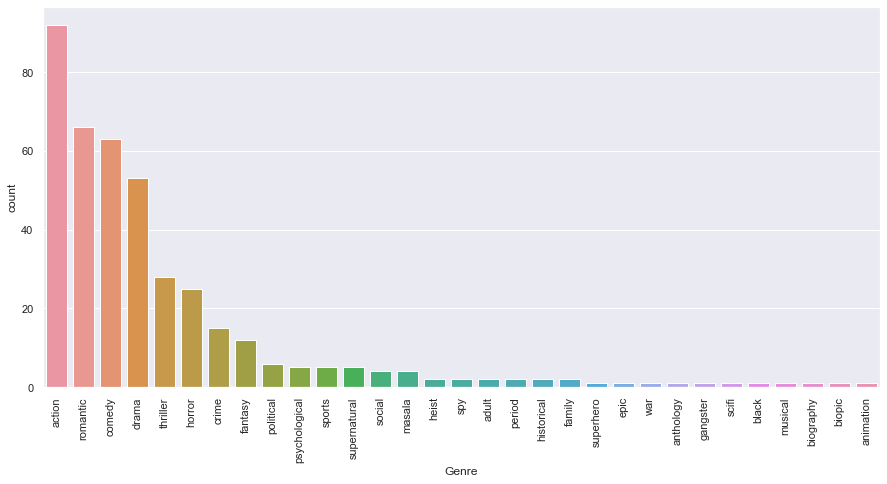

In [81]:
figd=(15,7)
fig,ax=plt.subplots(figsize=figd)
sns.countplot(x = "Genre", data=df, order = df.Genre.value_counts().index)
plt.xticks(rotation=90)
plt.show()

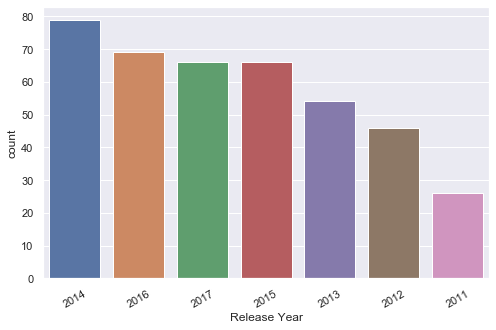

In [82]:
figd=(8,5)
fig,ax=plt.subplots(figsize=figd)
sns.countplot(x = "Release Year", data=df, order = df["Release Year"].value_counts().index)
plt.xticks(rotation=30)
plt.show()

In [101]:
df.groupby("Genre")["Rating"].max().sort_values(ascending=False)

Genre
crime            8.6
social           8.5
action           8.1
fantasy          8.1
romantic         8.1
drama            8.1
period           8.0
epic             7.9
horror           7.9
thriller         7.9
comedy           7.9
supernatural     7.9
political        7.9
musical          7.6
sports           7.3
spy              7.3
anthology        6.6
biopic           6.5
psychological    6.4
adult            6.4
historical       6.2
gangster         6.2
scifi            6.2
family           6.0
masala           5.8
heist            5.6
black            5.6
superhero        5.6
war              5.5
animation        4.8
biography        3.7
Name: Rating, dtype: float64

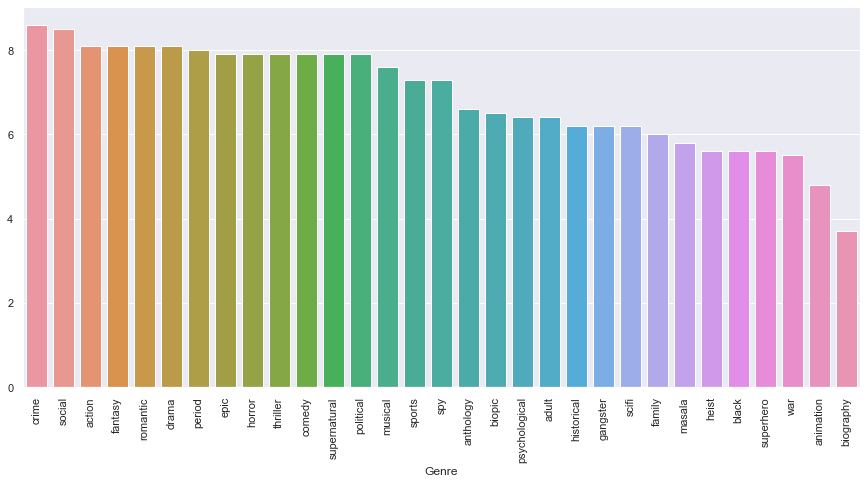

In [100]:
figd=(15,7)
fig,ax=plt.subplots(figsize=figd)
m = df.groupby("Genre")["Rating"].max().sort_values(ascending=False)
sns.barplot(x = m.index, y= m.values, data=df, ci=None)
plt.xticks(rotation=90)
plt.show()